In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
#import sympy as sym
import scipy.interpolate as interp

In [13]:
eigvals = np.loadtxt("example_data/WESAD_eigenvalues.csv", delimiter=",")

In [14]:
s = np.sort(eigvals[0])
Q_c = np.log(s[1:-1])
n = len(s)
p_i = np.linspace(0, 1, n)[1:-1]
logit = np.log(p_i / (1 - p_i))

In [ ]:
mu = cvx.Variable()
scale = cvx.Variable()
objective = cvx.Minimize(
    cvx.norm2(
        mu + scale * logit - Q_c
    )
)
prob = cvx.Problem(objective)
result = prob.solve(solver=cvx.CVXOPT)

In [ ]:
print(mu.value)

6.239455045061974


In [ ]:
print(scale.value)

0.3215499327087366


In [ ]:
m = mu.value
sc = scale.value

In [ ]:
CDF = np.exp((np.log(s)-m)/sc) / (1 + np.exp((np.log(s)-m)/sc))
pdf_fd = (CDF[1:] - CDF [:-1]) / ((s[-1] - s[0]) / n)

In [ ]:
#Quantile = np.exp(m + sc * np.log(s[1:-1]/(1-s[1:-1])))
Quantile = np.exp(m) * logit**float(sc)
mc_sample = np.random.choice(Quantile, size=100_000)

C:\Users\nickj\AppData\Local\Temp\ipykernel_15656\3242294390.py:2: RuntimeWarning: invalid value encountered in power
  Quantile = np.exp(m) * logit**float(sc)


In [ ]:
pdf = (np.exp(-m/sc)*s**((1-sc)/sc)) / (
    sc * (1 + np.exp((np.log(s)-m)/sc))**2
)

C:\Users\nickj\AppData\Local\Temp\ipykernel_15656\2505589329.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


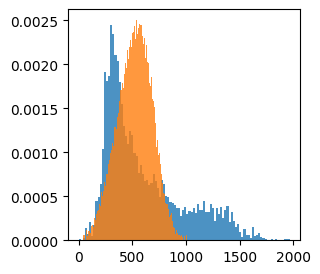

In [ ]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.hist(s, bins=100, density=True, alpha=.8)
#ax.plot( s[:-1], pdf_fd )
#ax.plot(s, CDF/1000)
ax.hist(mc_sample, bins=100, density=True, alpha=.8)
#ax.plot(s, pdf)
fig.show()

a1 =  5.740578978530084
a2 =  0.14338745127526878
a3 =  0.9999999553175718
a4 =  1.1660971528821396


C:\Users\nickj\AppData\Local\Temp\ipykernel_15656\3605824401.py:29: RuntimeWarning: invalid value encountered in power
  Quantile = np.exp(a1v) * np.exp(a4v*(p_i-.5)) * logit**(a2v + a3v*(p_i-.5))
C:\Users\nickj\AppData\Local\Temp\ipykernel_15656\3605824401.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


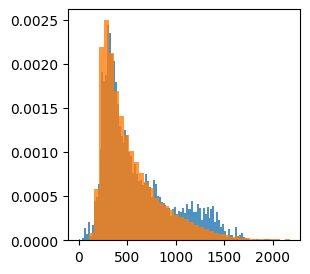

In [ ]:
s = np.sort(eigvals[0])
Q_c= np.log(s[1:-1])
n = len(s)
p_i = np.linspace(0, 1, n)[1:-1]
logit = np.log(p_i / (1 - p_i))
a1 = cvx.Variable()
a2 = cvx.Variable()
a3 = cvx.Variable()
a4 = cvx.Variable()
objective = cvx.Minimize(
    cvx.norm2(
        a1 + a4 * (p_i - .5) + cvx.multiply((a2 + a3*(p_i-.5)), logit) - Q_c
    )
)
cons = [a3 >= 1]
prob = cvx.Problem(objective, cons)
result = prob.solve(solver=cvx.CVXOPT)
a1v = a1.value
a2v = a2.value
a3v = a3.value
a4v = a4.value
print('a1 = ', a1v)
print('a2 = ', a2v)
print('a3 = ', a3v)
print('a4 = ', a4v)
#CDF = np.exp((np.log(s)-m)/sc) / (1 + np.exp((np.log(s)-m)/sc))
#pdf_fd = (CDF[1:] - CDF [:-1]) / ((s[-1] - s[0]) / n)
#Quantile = np.exp(m + sc * np.log(s[1:-1]/(1-s[1:-1])))
Quantile = np.exp(a1v) * np.exp(a4v*(p_i-.5)) * logit**(a2v + a3v*(p_i-.5))
mc_sample = np.random.choice(Quantile, size=100_000)
#pdf = (np.exp(-m/sc)*s**((1-sc)/sc)) / (
 #   sc * (1 + np.exp((np.log(s)-m)/sc))**2
#)
fig, ax = plt.subplots(figsize=(3, 3))
ax.hist(s, bins=100, density=True, alpha=.8)
#ax.plot( s[:-1], pdf_fd )
#ax.plot(s, CDF/1000)
ax.hist(mc_sample, bins=40, density=True, alpha=.8)
#ax.plot(s, pdf)
fig.show()

a1 =  478.7483142966558
a2 =  -51.10664184959254
a3 =  9.256784866087425
a4 =  1129.1259560555961
a5 =  1515.743160768206
a6 =  369.44585576466574


C:\Users\nickj\AppData\Local\Temp\ipykernel_15656\1167896598.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


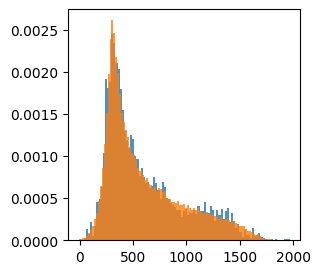

In [ ]:
s = np.sort(eigvals[0])
Q_c= s[1:-1]
#Q_c= np.log(s[1:-1])
n = len(s)
p_i = np.linspace(0, 1, n)[1:-1]
logit = np.log(p_i / (1 - p_i))
a1 = cvx.Variable()
a2 = cvx.Variable()
a3 = cvx.Variable()
a4 = cvx.Variable()
a5 = cvx.Variable()
a6 = cvx.Variable()
objective = cvx.Minimize(
    cvx.norm2(
        a1 + a4 * (p_i - .5) + a5 * (p_i - .5)**2
        + cvx.multiply(a2 + a3*(p_i-.5) + a6*(p_i-.5)**2, logit) 
        - Q_c
    )
)
#cons = [a >= .1 for a in [a1, a2, a3, a4, a5, a6]]
prob = cvx.Problem(objective)#, cons)
result = prob.solve(solver=cvx.CVXOPT)
a1v = a1.value
a2v = a2.value
a3v = a3.value
a4v = a4.value
a5v = a5.value
a6v = a6.value
print('a1 = ', a1v)
print('a2 = ', a2v)
print('a3 = ', a3v)
print('a4 = ', a4v)
print('a5 = ', a5v)
print('a6 = ', a6v)
#CDF = np.exp((np.log(s)-m)/sc) / (1 + np.exp((np.log(s)-m)/sc))
#pdf_fd = (CDF[1:] - CDF [:-1]) / ((s[-1] - s[0]) / n)
#Quantile = np.exp(m + sc * np.log(s[1:-1]/(1-s[1:-1])))
Quantile = a1v+a4v*(p_i-.5)+a5v*(p_i-.5)**2 + logit * (a2v+a3v*(p_i-.5)+a6v*(p_i-.5)**2)
mc_sample = np.random.choice(Quantile, size=100_000)
#pdf = (np.exp(-m/sc)*s**((1-sc)/sc)) / (
 #   sc * (1 + np.exp((np.log(s)-m)/sc))**2
#)
fig, ax = plt.subplots(figsize=(3, 3))
ax.hist(s, bins=100, density=True, alpha=.8)
#ax.plot( s[:-1], pdf_fd )
#ax.plot(s, CDF/1000)
ax.hist(mc_sample, bins=100, density=True, alpha=.8)
#ax.plot(s, pdf)
fig.show()

a1 =  419.24544706968743
a2 =  -100.72868898972493
a3 =  -8.307319916914143
a4 =  1478.4285226846223
a5 =  2335.159966124223
a6 =  500.59717304391927


C:\Users\nickj\AppData\Local\Temp\ipykernel_15656\3735589585.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


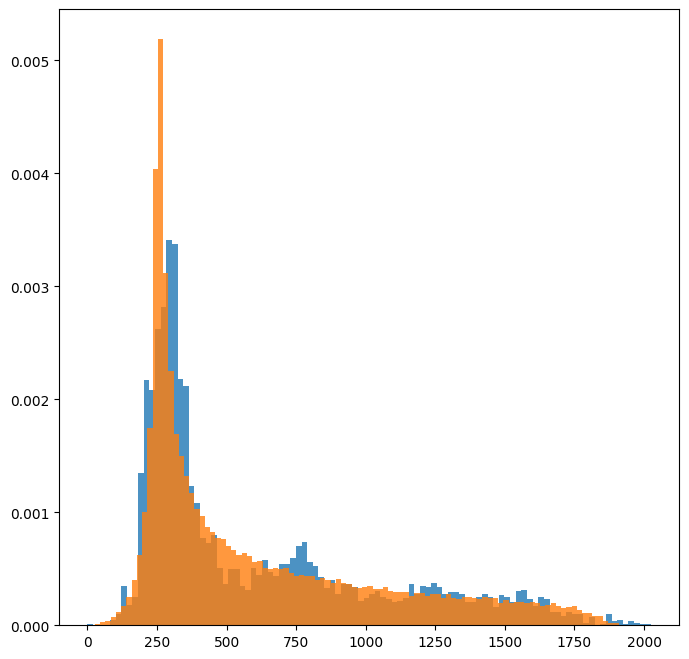

In [ ]:
s = np.sort(eigvals[25])
Q_c= s[1:-1]
#Q_c= np.log(s[1:-1])
n = len(s)
p_i = np.linspace(0, 1, n)[1:-1]
logit = np.log(p_i / (1 - p_i))
a1 = cvx.Variable()
a2 = cvx.Variable()
a3 = cvx.Variable()
a4 = cvx.Variable()
a5 = cvx.Variable()
a6 = cvx.Variable()
objective = cvx.Minimize(
    cvx.norm2(
        a1 + a4 * (p_i - .5) + a5 * (p_i - .5)**2
        + cvx.multiply(a2 + a3*(p_i-.5) + a6*(p_i-.5)**2, logit) 
        - Q_c
    )
)
#cons = [a >= .1 for a in [a1, a2, a3, a4, a5, a6]]
prob = cvx.Problem(objective)#, cons)
result = prob.solve(solver=cvx.CVXOPT)
a1v = a1.value
a2v = a2.value
a3v = a3.value
a4v = a4.value
a5v = a5.value
a6v = a6.value
print('a1 = ', a1v)
print('a2 = ', a2v)
print('a3 = ', a3v)
print('a4 = ', a4v)
print('a5 = ', a5v)
print('a6 = ', a6v)
#CDF = np.exp((np.log(s)-m)/sc) / (1 + np.exp((np.log(s)-m)/sc))
#pdf_fd = (CDF[1:] - CDF [:-1]) / ((s[-1] - s[0]) / n)
#Quantile = np.exp(m + sc * np.log(s[1:-1]/(1-s[1:-1])))
Quantile = a1v+a4v*(p_i-.5)+a5v*(p_i-.5)**2 + logit * (a2v+a3v*(p_i-.5)+a6v*(p_i-.5)**2)
mc_sample = np.random.choice(Quantile, size=100_000)
#pdf = (np.exp(-m/sc)*s**((1-sc)/sc)) / (
 #   sc * (1 + np.exp((np.log(s)-m)/sc))**2
#)
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(s, bins=100, density=True, alpha=.8)
#ax.plot( s[:-1], pdf_fd )
#ax.plot(s, CDF/1000)
ax.hist(mc_sample, bins=100, density=True, alpha=.8)
#ax.plot(s, pdf)
fig.show()

In [ ]:
x, p, mu, sc = sym.symbols('x p mu sc')
cdf = sym.solve(mu + sc * sym.log(p/(1-p)) - x, p)
pdf = sym.diff(
    cdf[0],
    x
)

In [ ]:
pdf

exp((-mu + x)/sc)/(sc*(exp((-mu + x)/sc) + 1)) - exp(2*(-mu + x)/sc)/(sc*(exp((-mu + x)/sc) + 1)**2)

In [ ]:
pdf_num = sym.lambdify([x, mu, sc], pdf, 'numpy')

In [ ]:
pdf_num(3, 1, 1)

0.10499358540350656

In [ ]:
a1 = cvx.Variable()
a2 = cvx.Variable()
objective = cvx.Minimize(
    cvx.norm2(
        a1 + a2 * logit - Q_c
    )
)
prob = cvx.Problem(objective)
result = prob.solve(solver=cvx.CVXOPT)

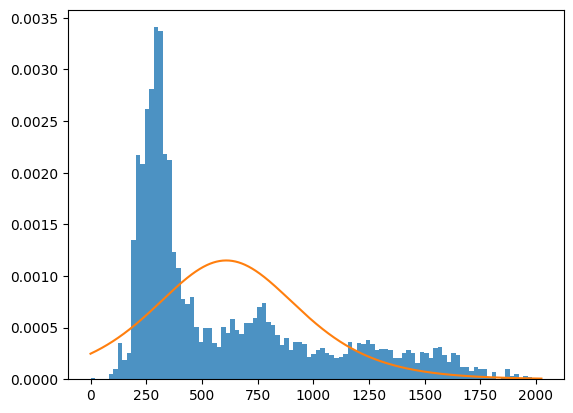

In [ ]:
fig, ax = plt.subplots()
ax.hist(s, bins=100, density=True, alpha=.8)
t = np.linspace(0, np.max(s), 1_000)
plt.plot(t, pdf_num(t, a1.value, a2.value))

In [ ]:
s.shape

(4072,)

In [ ]:
def mu_indices():
    yield 0
    yield 3
    yield 4
    current = 4
    while True:
        current += 2
        yield current

In [ ]:
mu_inds = mu_indices()

In [ ]:
for ind, term in zip(mu_inds, range(20)):
    print(ind, " ", term)
    if ind > 20:
        break

0   0
3   1
4   2
6   3
8   4
10   5
12   6
14   7
16   8
18   9
20   10
22   11


In [ ]:
class Person:

    @staticmethod
    def func1():
        return Person.func2()
    
    @staticmethod
    def func2():
        return "(:"

In [ ]:
Person.func1()

'(:'

In [17]:
expr3 = 0
expr3 += a[0]
expr3

Expression(AFFINE, UNKNOWN, ())

In [19]:
len(a)

TypeError: object of type 'Variable' has no len()

/tmp/ipykernel_8623/3357460488.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


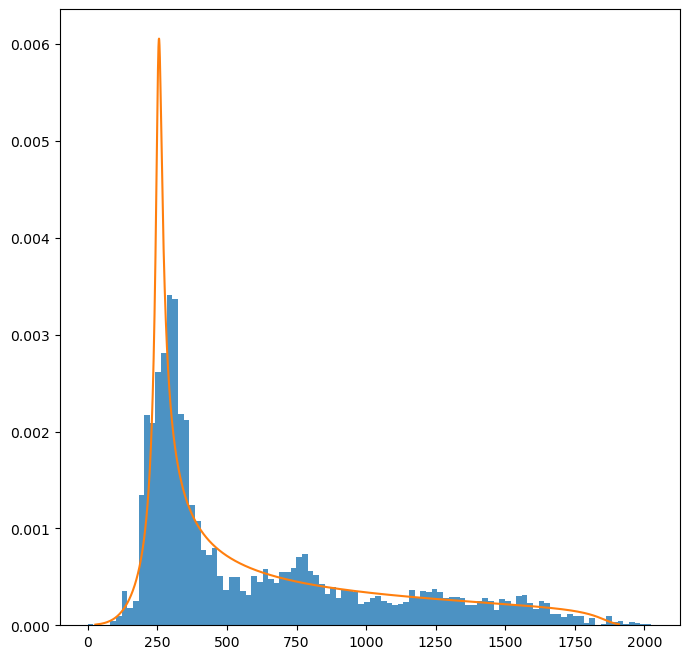

In [15]:
s = np.sort(eigvals[25])
Q_c = s[1:-1]
#Q_c= np.log(s[1:-1])
n = len(s)
p_i = np.linspace(0, 1, n)[1:-1]
logit = np.log(p_i / (1 - p_i))
k = 6
a = cvx.Variable(k)
if k >= 5:
    inds1 = list(range(4, k, 2))
    pow1 = np.arange(2, int(k/2), 1)
    expr1 = a[0] + a[3] * (p_i - .5)
    for i in range(len(inds1)):
        expr1 += a[inds1[i]] * (p_i - .5)**int(pow1[i])
elif k == 4:
    expr1 = "replace this"
else:
    expr1 = "reaally dude?"
if k >= 6:
    inds2 = list(range(5, k, 2))
    pow2 = np.arange(2, int(k/2), 1)
    expr2 = a[1] + a[2] * (p_i - .5)
    for i in range(len(inds2)):
        expr2 += a[inds2[i]] * (p_i - .5)**int(pow2[i])
elif k == 4:
    expr2 = "this needs replaced"
else:
    expr2 = "reaally dude?"
objective = cvx.Minimize(
    cvx.norm2(
        expr1 + cvx.multiply(expr2, logit) - Q_c
    )
)
prob = cvx.Problem(objective)
result = prob.solve()

av = a.value
def func1(p):
        return av[0] + av[3] * (p - .5) + av[4]*(p-.5)**2#np.sum(av[inds1] * (p - .5)**pow1, axis=0) # need to be careful about summing if len(inds1) == 1
def func2(p):
        return av[1] + av[2] * (p - .5) + av[5]*(p-.5)**2#np.sum(av[inds2] * (p - .5)**pow2, axis=0)

CDF_emperical_x = func1(p_i) + func2(p_i) * logit
CDF_emperical_p = p_i
CDF_spline = interp.PchipInterpolator( # monoticity-preserving cubic splines
    CDF_emperical_x, CDF_emperical_p
)
pdf_spline = CDF_spline.derivative()

Quantile = func1(p_i) + func2(p_i) * logit
mc_sample = np.random.choice(Quantile, size=1_000_000)

fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(s, bins=100, density=True, alpha=.8)
#ax.plot(CDF_emperical_x, CDF_emperical_p)
#ax.plot(CDF_emperical_x, CDF_spline(CDF_emperical_x))
ax.plot(CDF_emperical_x, pdf_spline(CDF_emperical_x))
#ax.hist(mc_sample, bins=1000, density=True)
fig.show()

In [16]:
# Akaike information criterion
randsamp = np.random.choice(s, size=10)
likelihood = np.product( pdf_spline(randsamp) )
AICval = 2*k - 2*np.log(likelihood)
AICval

141.96772841436731

In [ ]:
# make a subclass of the scipy distribution class

# https://docs.scipy.org/doc/scipy/reference/stats.html

In [ ]:
k = 6
pow1 = np.arange(2, int(k/2))
pow1

array([2])

In [ ]:
nums = np.array([[1, 2, 3],
                 [1, 2, 3],
                 [1, 2, 3]])
np.sum(nums, axis=1)

array([6, 6, 6])

In [ ]:
a = cvx.Variable(4)
inds1 = [0, 1]
inds2 = [2, 3]
pow1 = np.array([2, 2])
pow2 = np.array([2, 2])
expr = a[0]**int(pow1[0])
expr += a[1]**2
objective = cvx.Minimize(
    expr
)
prob = cvx.Problem(objective)
prob.solve()

0.0

In [ ]:
base = np.array([2, 2])
power = np.array([2, 3])
base**power

array([4, 8])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def make_random_walk(n):
    x = np.zeros(n)
    x[0] = 1
    for i in range(1, n):
        xi = np.random.choice([-1, 1])
        x[i] = x[i-1] + xi
    return x

In [ ]:
def exit_time(x, upper_bound=3, lower_bound=0):
    first_time_below = np.min(
        np.where(x <= lower_bound)[0]
    )
    first_time_above = np.min(
        np.where( x >= upper_bound)[0]
    )
    return np.min([first_time_above, first_time_below])

In [ ]:
def get_exit_times(realizations=100):
    exit_times = np.zeros(realizations)
    for i in range(realizations):
        x = make_random_walk(10_000)
        exit = exit_time(x)
        exit_times[i] = exit
    return exit_times

In [ ]:
plt.hist(
    get_exit_times(),
    bins = 30
)

ValueError: zero-size array to reduction operation minimum which has no identity

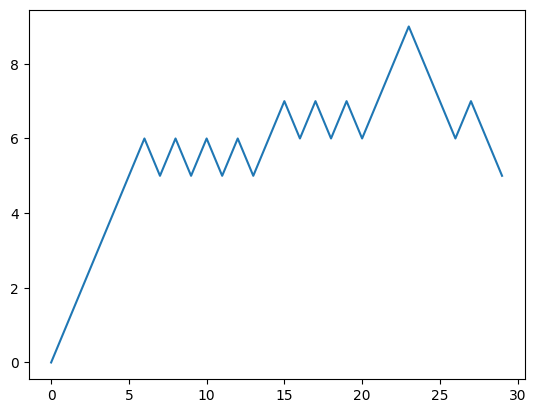

In [ ]:
plt.plot(random_walk)

In [ ]:
np.where( random_walk >= 5)[0]

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [ ]:
def exit_time_distribution(realizations, upper_bound=10, lower_bound=3, x0=5):
    exit_times = np.zeros(realizations)
    for i in range(realizations):
        x = x0
        time = 0
        while (x < upper_bound and x > lower_bound):
            x = x + np.random.choice([-1, 1])
            time += 1
        exit_times[i] = time
    return exit_times

In [ ]:
exit_times = exit_time_distribution(realizations=10_000)

C:\Users\nickj\AppData\Local\Temp\ipykernel_14464\3275873638.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


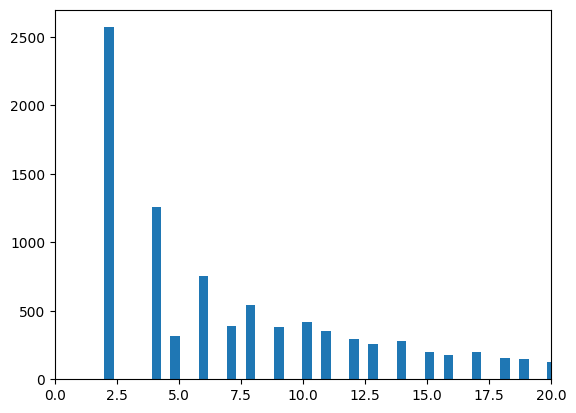

In [ ]:
fig, ax = plt.subplots()
ax.hist(exit_times, bins=200)
ax.set_xlim([0,20])
fig.show()


In [ ]:
exit_times[:20]

array([  6.,  16.,  33.,  27.,  92.,  49.,  28.,  17.,  94.,  24.,  20.,
        60.,  12., 125.,  22.,  64.,  17.,  17.,  49.,  15.])

In [ ]:
def exit_time_distribution(realizations, upper_bound=10, lower_bound=0, x0=5):
    exit_times = np.zeros(realizations)
    for i in range(realizations):
        x = x0
        time = 0
        while (x < upper_bound and x > lower_bound):
            x = x + np.random.choice([-1, 0, 1])
            time += 1
        exit_times[i] = time
    return exit_times

(array([8.5250e+03, 1.0035e+04, 9.8700e+03, 8.8870e+03, 7.7350e+03,
        6.8030e+03, 5.9900e+03, 5.2880e+03, 4.6800e+03, 3.9710e+03,
        4.3910e+03, 2.9380e+03, 2.6160e+03, 2.3110e+03, 2.0040e+03,
        1.7310e+03, 1.5800e+03, 1.3300e+03, 1.1660e+03, 1.0190e+03,
        1.1070e+03, 7.6300e+02, 6.5000e+02, 6.1600e+02, 5.0700e+02,
        4.3000e+02, 3.8400e+02, 3.4400e+02, 2.4900e+02, 2.6500e+02,
        2.8600e+02, 1.8000e+02, 1.7000e+02, 1.4700e+02, 1.3300e+02,
        1.0500e+02, 9.9000e+01, 8.0000e+01, 7.3000e+01, 7.5000e+01,
        6.0000e+01, 5.4000e+01, 3.8000e+01, 3.4000e+01, 3.4000e+01,
        2.8000e+01, 2.0000e+01, 1.7000e+01, 1.6000e+01, 2.2000e+01,
        2.1000e+01, 1.3000e+01, 1.8000e+01, 8.0000e+00, 1.1000e+01,
        1.2000e+01, 1.0000e+01, 7.0000e+00, 7.0000e+00, 4.0000e+00,
        4.0000e+00, 3.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

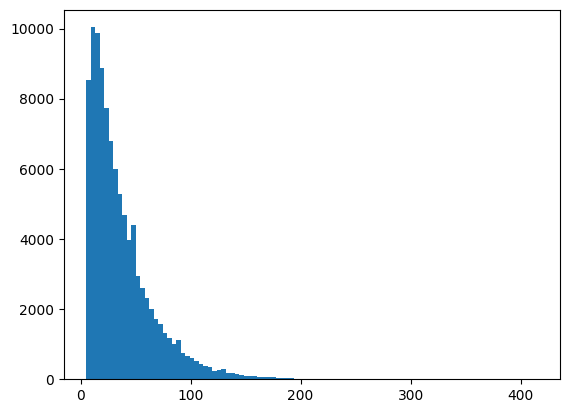

In [ ]:
exit_times = exit_time_distribution(realizations=100_000)
plt.hist(exit_times, bins=100)